In [3]:
import requests
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Download function
def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download {filename}")

# Download dataset
dataset_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"
text_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip"

download_file(dataset_url, "Flickr8k_Dataset.zip")
download_file(text_url, "Flickr8k_text.zip")

# Extract files
with zipfile.ZipFile("Flickr8k_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("Flickr8k_Dataset")
with zipfile.ZipFile("Flickr8k_text.zip", 'r') as zip_ref:
    zip_ref.extractall("Flickr8k_text")

# Load captions
captions_file = "Flickr8k_text/Flickr8k.token.txt"
captions_df = pd.read_csv(captions_file, sep='\t', names=['image', 'caption'])
captions_df['image'] = captions_df['image'].apply(lambda x: x.split('#')[0])

# EDA
print("Total number of captions:", len(captions_df))
print("Number of unique images:", captions_df['image'].nunique())

Downloaded Flickr8k_Dataset.zip
Downloaded Flickr8k_text.zip
Total number of captions: 40460
Number of unique images: 8092


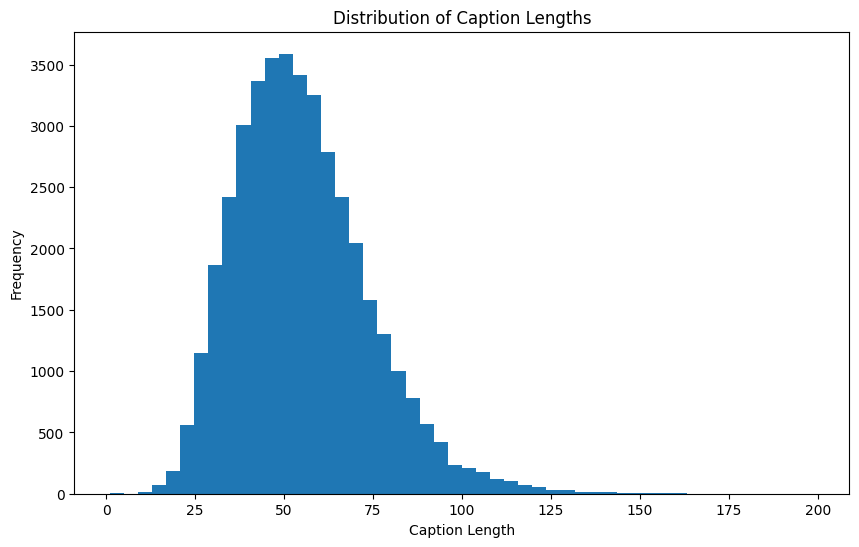

In [4]:
import re
from collections import Counter

# Caption length distribution
captions_df['caption_length'] = captions_df['caption'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(captions_df['caption_length'], bins=50)
plt.title('Distribution of Caption Lengths')
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.show()

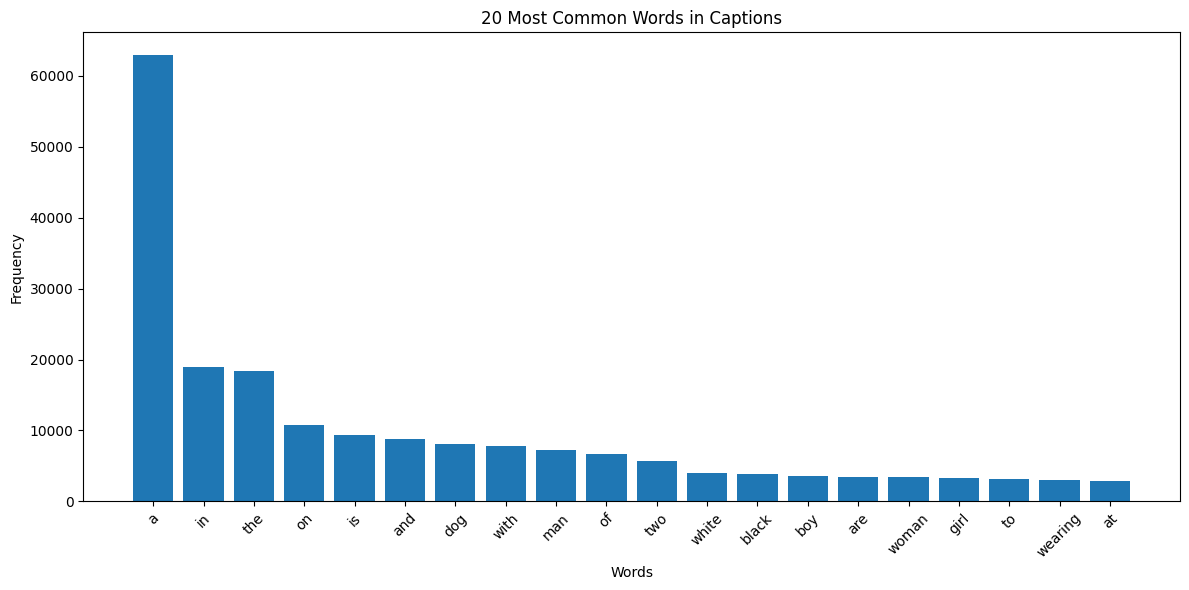

In [5]:
# Most common words
all_words = ' '.join(captions_df['caption']).lower()
all_words = re.findall(r'\w+', all_words)
word_counts = Counter(all_words)

plt.figure(figsize=(12, 6))
plt.bar(range(20), [count for word, count in word_counts.most_common(20)])
plt.xticks(range(20), [word for word, count in word_counts.most_common(20)], rotation=45)
plt.title('20 Most Common Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

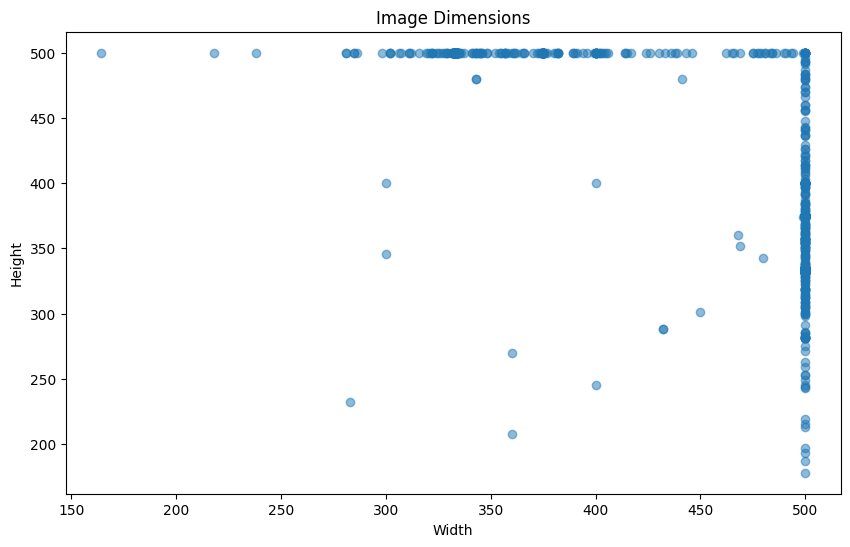

In [6]:
# Image analysis
image_dir = "Flickr8k_Dataset/Flicker8k_Dataset"
image_sizes = []
for image_file in os.listdir(image_dir)[:1000]:  # Analyze first 1000 images
    with Image.open(os.path.join(image_dir, image_file)) as img:
        image_sizes.append(img.size)

widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [7]:
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

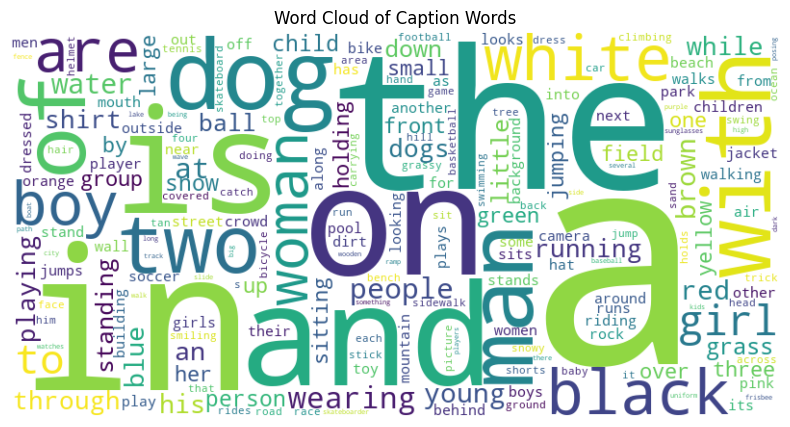

In [9]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Caption Words')
plt.show()

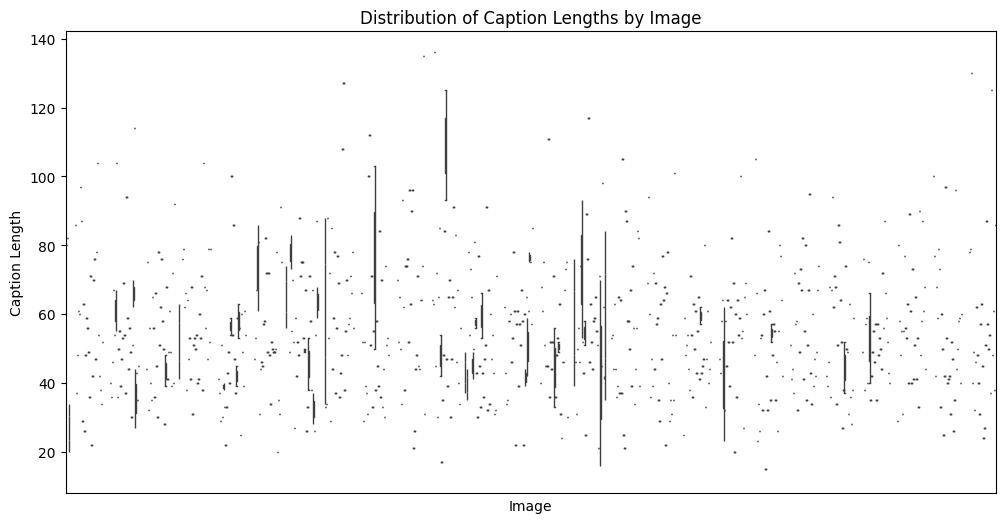

In [10]:
# Boxplot of caption lengths by image
plt.figure(figsize=(12, 6))
sns.boxplot(x='image', y='caption_length', data=captions_df.sample(1000))  # Sample 1000 for visibility
plt.title('Distribution of Caption Lengths by Image')
plt.xlabel('Image')
plt.ylabel('Caption Length')
plt.xticks([])  # Hide x-axis labels for clarity
plt.show()

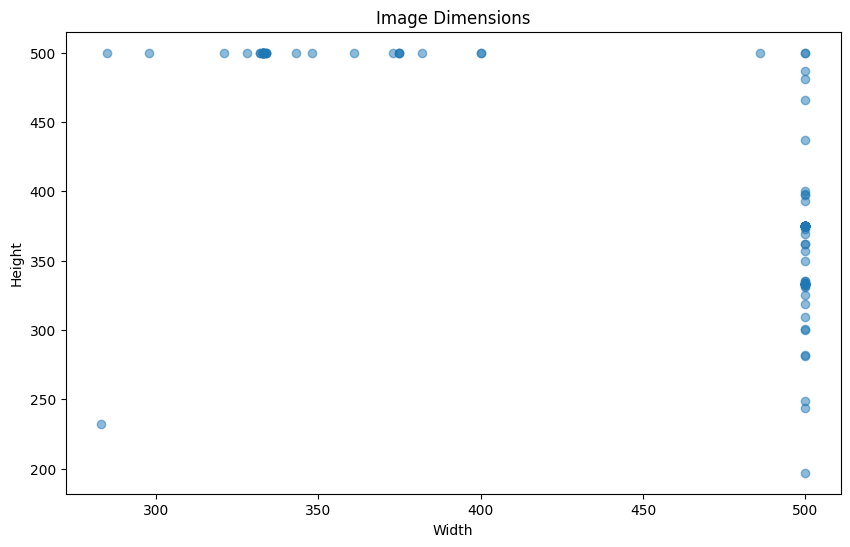

In [12]:
# Image analysis
image_dir = "Flickr8k_Dataset/Flicker8k_Dataset"
image_sizes = []
color_distributions = []

for image_file in os.listdir(image_dir)[:100]:  # Analyze first 100 images
    with Image.open(os.path.join(image_dir, image_file)) as img:
        image_sizes.append(img.size)
        img_array = np.array(img)
        if len(img_array.shape) == 3:  # Check if the image is colored
            color_dist = img_array.mean(axis=(0, 1))
            color_distributions.append(color_dist)

widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

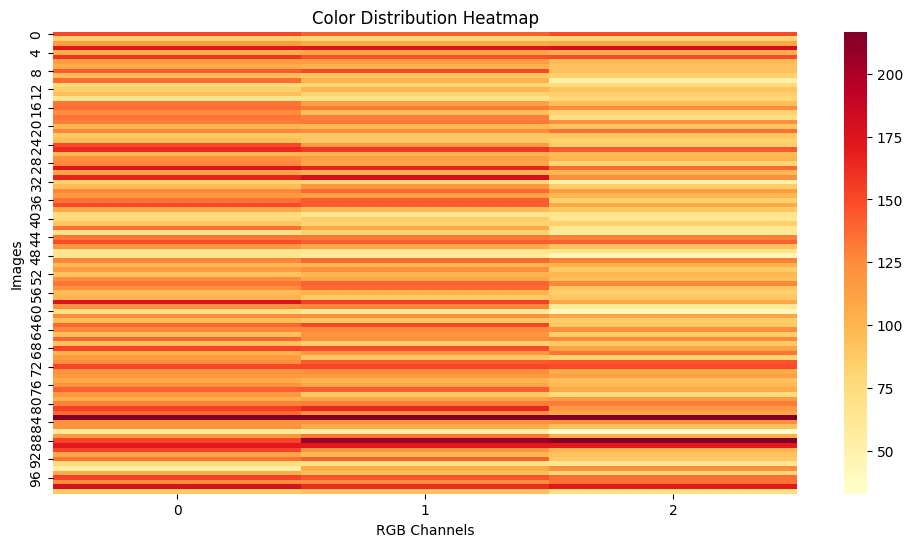

In [13]:
# Color distribution heatmap
if color_distributions:
    plt.figure(figsize=(12, 6))
    sns.heatmap(color_distributions, cmap='YlOrRd')
    plt.title('Color Distribution Heatmap')
    plt.xlabel('RGB Channels')
    plt.ylabel('Images')
    plt.show()

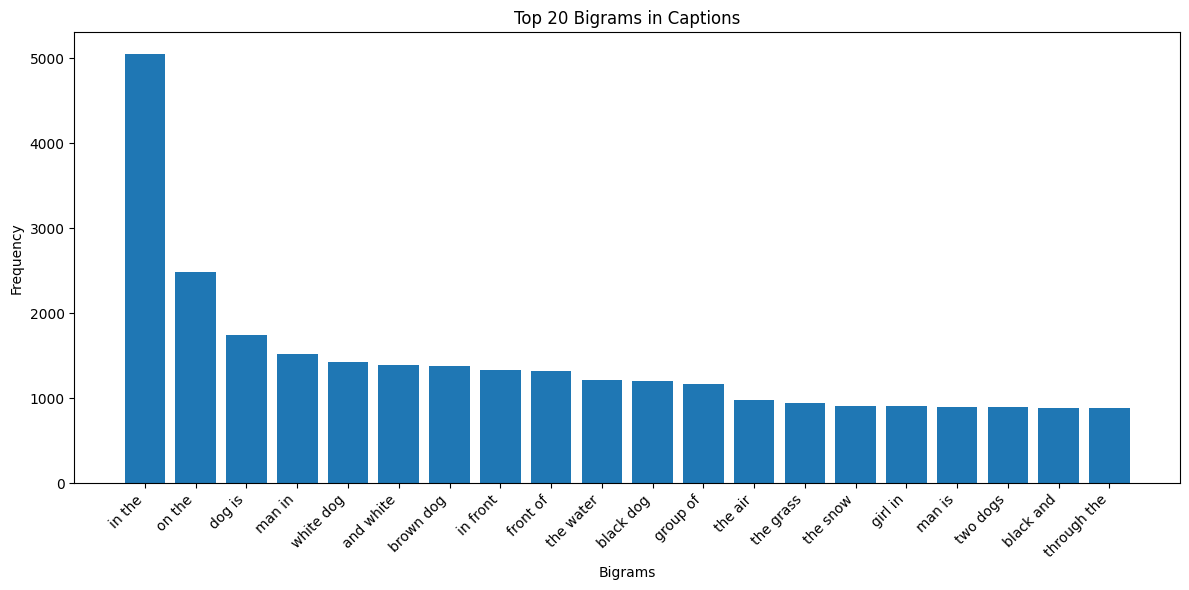

In [14]:
# N-gram analysis
vectorizer = CountVectorizer(ngram_range=(2, 2))
ngrams = vectorizer.fit_transform(captions_df['caption'])
ngram_counts = ngrams.sum(axis=0).A1
ngram_words = vectorizer.get_feature_names_out()
top_ngrams = sorted(zip(ngram_counts, ngram_words), reverse=True)[:20]

plt.figure(figsize=(12, 6))
plt.bar(range(20), [count for count, word in top_ngrams])
plt.xticks(range(20), [word for count, word in top_ngrams], rotation=45, ha='right')
plt.title('Top 20 Bigrams in Captions')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()